In [1]:
from include.road_process import Road
from include.cool_space import CoolSpace
from include.building import Building
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt

In [2]:
directory_mac = "/Volumes/T7 Shield/TUD/Synthesis/cool_place/"
directory_win = "G:\\TUD\\Synthesis\\cool_place\\"

landuse_file = directory_mac + "ams_landuse_top10NL.shp"
road_file = directory_mac + "ams_roads_top10NL.shp"
building_file = directory_mac + "ams_buildings_bagplus.shp"
shadow_file = directory_mac + "testShadow.tif"

In [ ]:
road = Road(gpd.read_file(road_file))

In [ ]:
building = Building(gpd.read_file(building_file))

In [3]:
coolSpace = CoolSpace(gpd.read_file(landuse_file))

In [4]:
shadows = []
shadow_map1 = rasterio.open(shadow_file, crs=coolSpace.data.crs)
print(shadow_map1.crs)
shadows.append(shadow_map1)

EPSG:28992


In [ ]:
road.create_attribute('typeweg', 'buffer')
road.create_buffer('buffer')
building.create_buffer(4)

In [ ]:
road.data = road.data.set_geometry("buffered")
coolSpace.clip(coolSpace.data, road.data)

building.data = building.data.set_geometry("buffered")
coolSpace.data = coolSpace.data.set_geometry("clipped")
coolSpace.clip(coolSpace.data, building.data)

In [5]:
coolSpace.calculate_shade(shadows, use_clip=False)

No clipped geometry, default geometry will be used.
Processing raster 1/1
POLYGON ((120000 484980, 120000 486270, 118980 486270, 118980 484980, 120000 484980))
Clipped geometry 14032, area: 1514.319196671122
Clipped geometry 14037, area: 9264.144550999288
Clipped geometry 14038, area: 13949.809757003415
Clipped geometry 14039, area: 4495.801576698443
Clipped geometry 14045, area: 9055.454132001963
Clipped geometry 14056, area: 1700.8084019998216
Clipped geometry 14059, area: 1096.3850345021058
Clipped geometry 14062, area: 4529.916380842379
Clipped geometry 16452, area: 1077.9513427989696
Clipped geometry 16453, area: 675.8042984405092
Clipped geometry 16456, area: 3082.4073144994104
Clipped geometry 16464, area: 4816.37056486521
Clipped geometry 16584, area: 4813.9034839965625
Clipped geometry 16592, area: 323.03217149980816
Clipped geometry 16593, area: 281.88989400023223
Clipped geometry 16594, area: 287.63970249958015
Clipped geometry 16595, area: 249.30536149973022
Clipped geometr

In [13]:
# 打印 shadeGeom0 列中不是 None 的行
non_none_rows = coolSpace.data[coolSpace.data["shadeGeom0"].notna()]
print(non_none_rows[["shadeGeom0"]]["shadeGeom0"].area.max())  # 只打印前20行

8336.5


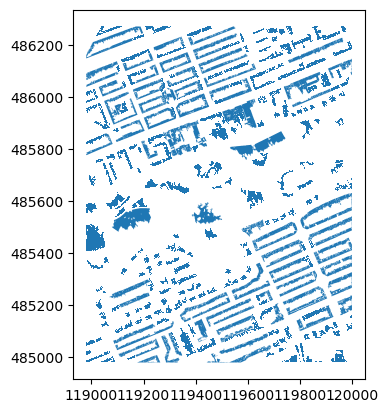

In [8]:
coolSpace.data["shadeGeom0"].plot()
plt.show()

In [ ]:
coolSpace_clipped = gpd.GeoDataFrame(coolSpace.data, geometry='clipped', crs=coolSpace.data.crs)
coolSpace_clipped.drop(columns=["geometry"], inplace=True)
coolSpace_clipped.to_file(directory_win + "test.shp")

coolSpace_origin = gpd.GeoDataFrame(coolSpace.data, geometry='geometry', crs=coolSpace.data.crs)
coolSpace_origin.drop(columns=["clipped"], inplace=True)
coolSpace_origin.to_file(directory_win + "test2.shp")